Notebook này chạy trên local.

# Regression with an Abalone Dataset

[Link_to_competition](https://www.kaggle.com/competitions/playground-series-s4e4)

## Exploring datasets

In [1]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [2]:
!kaggle competitions download -c playground-series-s4e4

playground-series-s4e4.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
with ZipFile('playground-series-s4e4.zip') as f:
    f.extractall('data')

In [4]:
import pandas as pd

raw_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sub_df = pd.read_csv('data/sample_submission.csv')

In [5]:
raw_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [6]:
raw_df.drop(columns='id', inplace=True)

In [7]:
def view_avg_of_each(cat_features: str):
    d = dict()
    cols = raw_df[cat_features].unique()
    for x in cols:
        d[x] = raw_df[raw_df[cat_features]==x]['Rings'].mean()
    return pd.Series(d, index=cols)

In [8]:
def view_categoricals_feature(cat_col: str):
    d = dict()    
    total = raw_df[cat_col].value_counts()
    idx = raw_df['Rings'].value_counts().index.tolist()
    for t in idx:
        x = raw_df[raw_df['Rings']==t][cat_col].value_counts()
        d[t] = x/total*100
    
    return pd.DataFrame(data=d, columns=idx)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
def draw_numeric_features(data, x=None, y=None, overlap=None):
    plt.figure(figsize=(30,10))
    plt.grid()
    sns.lineplot(data, x=x, y=y)
    if overlap is not None:
        for plot in overlap:
            sns.lineplot(data=plot[0], x=plot[1], y=plot[2])

In [11]:
raw_df['Rings'].value_counts()

Rings
9     17465
8     14499
10    12464
7      9008
11     8407
6      5411
12     4719
13     4074
5      2862
14     2507
15     2072
16     1439
4      1402
17     1175
18      848
19      639
20      507
3       386
21      255
23      180
22      108
27       41
2        29
24       29
1        25
29       24
25       22
26       18
Name: count, dtype: int64

### Sex

In [12]:
raw_df['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [13]:
view_avg_of_each('Sex')

F    11.161389
I     7.533557
M    10.753408
dtype: float64

In [14]:
view_categoricals_feature('Sex')

,9,8,10,7,11,6,12,13,5,14,...,21,23,22,27,2,24,1,29,25,26
Sex,,,,,,,,,,,,,,,,,,,,,
F,22.404227,8.986601,19.014908,2.060766,13.964899,0.479336,8.477071,7.137196,0.064163,4.336667,...,0.513304,0.366107,0.230232,0.064163,0.007549,0.041517,0.026420,0.045292,0.037743,0.026420
I,13.102469,25.727495,4.426918,22.551597,1.846312,15.093826,1.024386,0.985103,8.167890,0.568096,...,0.033240,0.024174,0.015109,0.003022,0.063458,NaN,0.039283,0.006044,NaN,0.003022
M,23.183034,11.615690,19.212299,3.219776,13.201405,0.931447,6.877881,5.985110,0.457666,3.770909,...,0.348084,0.241725,0.135366,0.074129,0.019338,0.058014,0.016115,0.032230,0.038676,0.032230


### Size

In [15]:
import numpy as np

In [16]:
raw_df[['Length','Diameter','Height']].describe()

,Length,Diameter,Height
count,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464
std,0.118217,0.098026,0.038008
min,0.075000,0.055000,0.000000
25%,0.445000,0.345000,0.110000
50%,0.545000,0.425000,0.140000
75%,0.600000,0.470000,0.160000
max,0.815000,0.650000,1.130000


In [17]:
raw_df[raw_df['Height']>0]['Height'].describe()

count    90609.000000
mean         0.135473
std          0.037993
min          0.004000
25%          0.110000
50%          0.140000
75%          0.160000
max          1.130000
Name: Height, dtype: float64

In [18]:
raw_df['Height'] = raw_df['Height'].apply(lambda x: x if x>0 else 0.001)

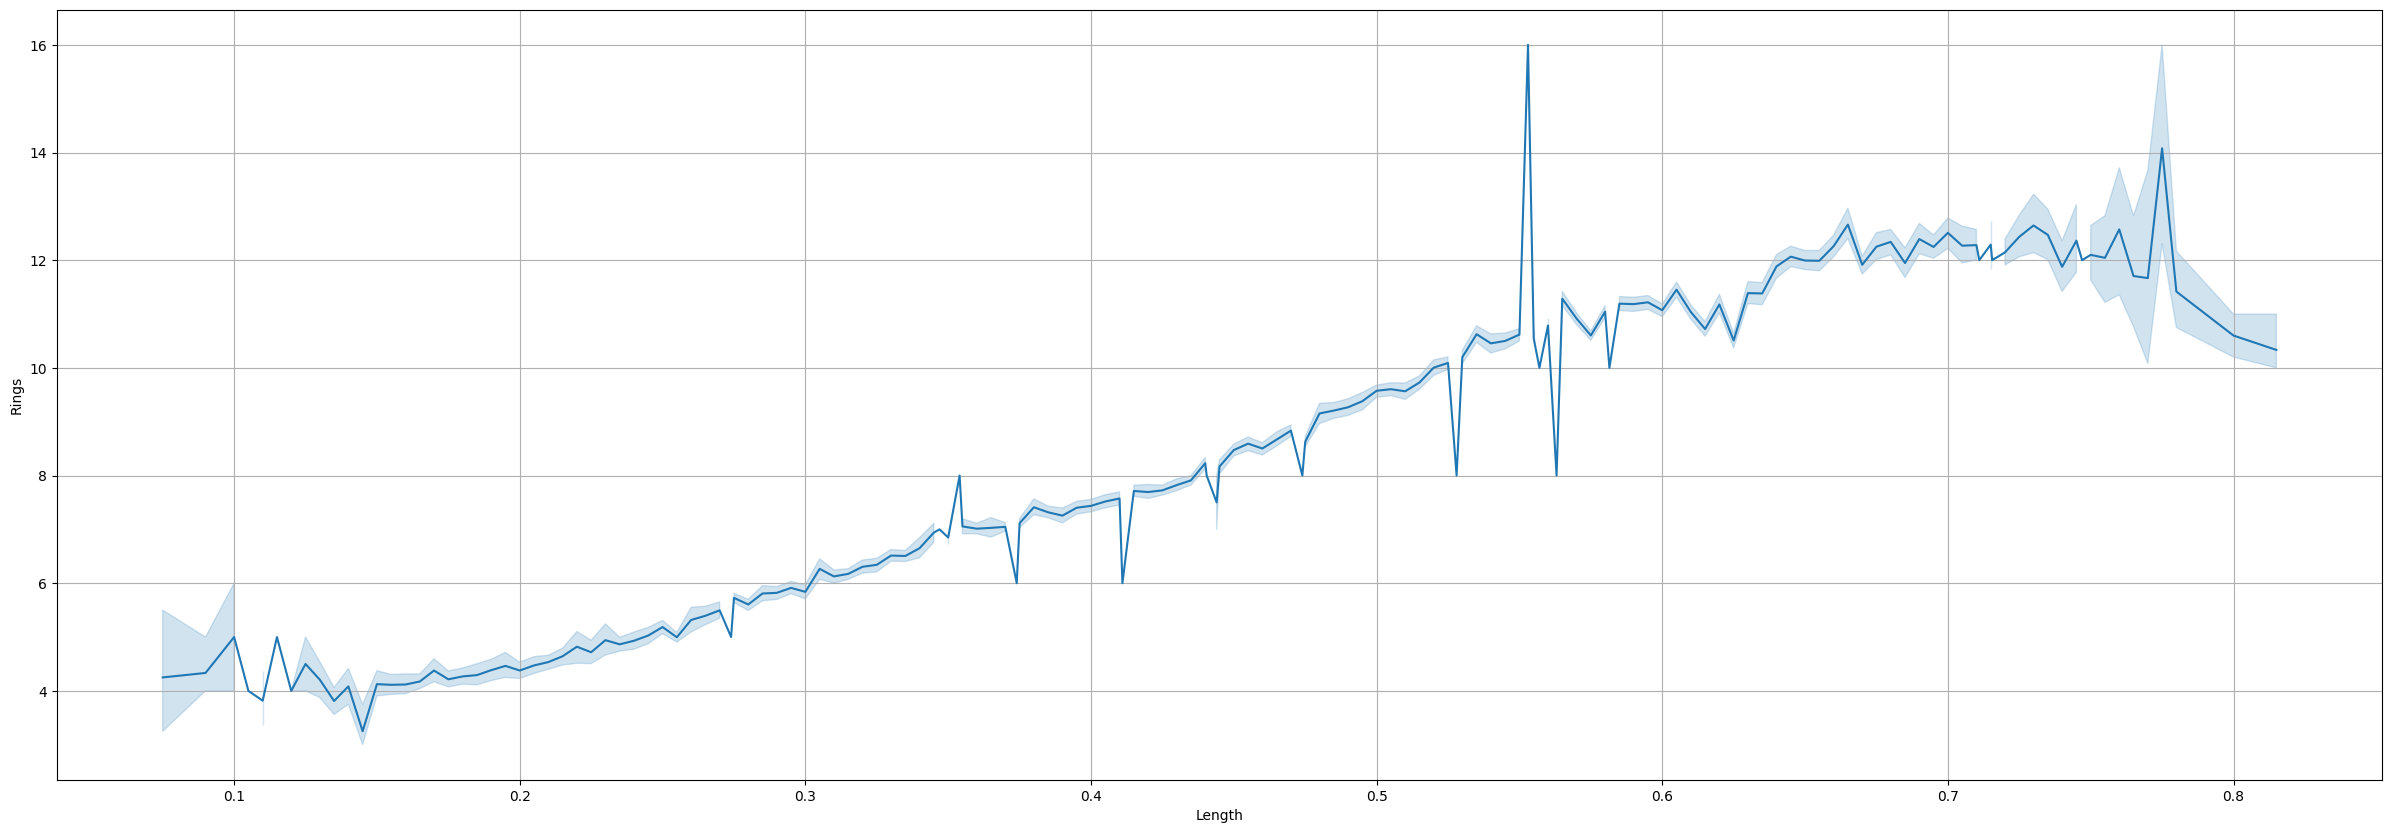

In [19]:
draw_numeric_features(raw_df, 'Length', 'Rings')

In [20]:
raw_df['Rings'].corr(raw_df['Length'])

0.6237856646237645

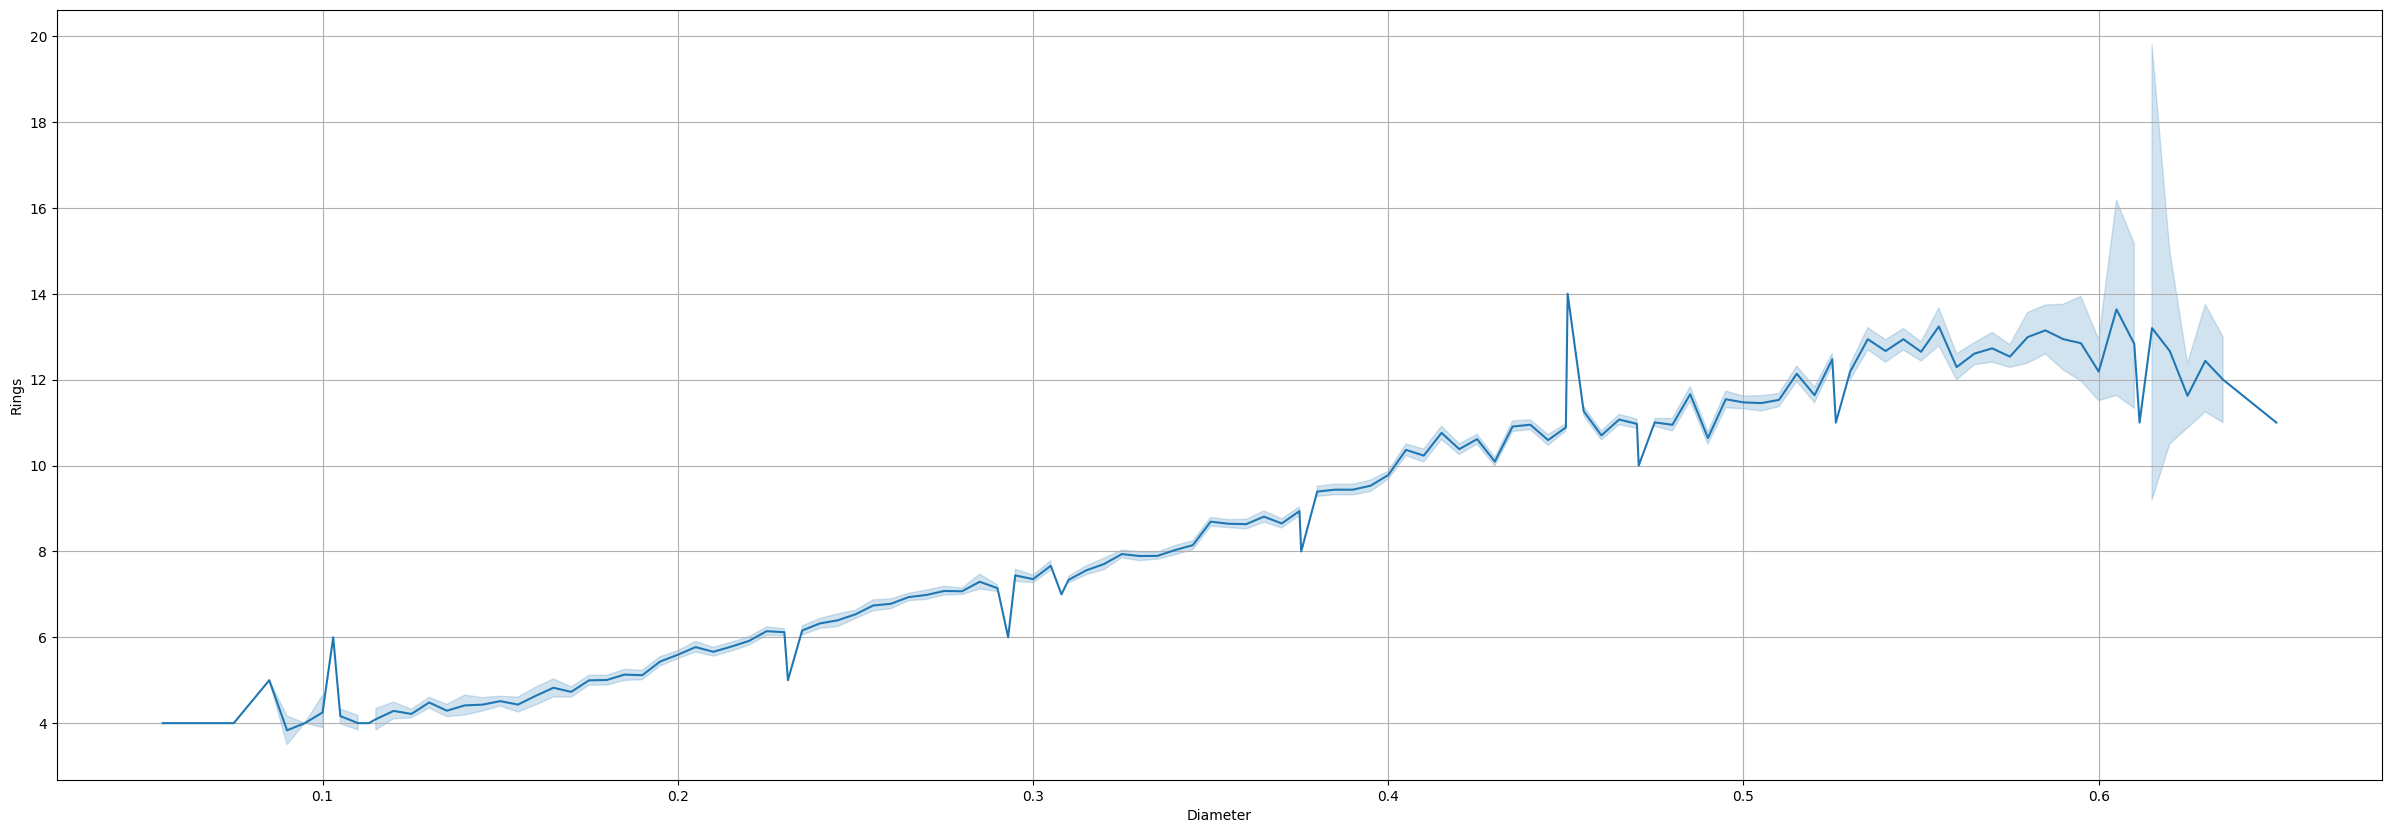

In [21]:
draw_numeric_features(raw_df, 'Diameter', 'Rings')

In [22]:
raw_df['Rings'].corr(raw_df['Diameter'])

0.6368323390197851

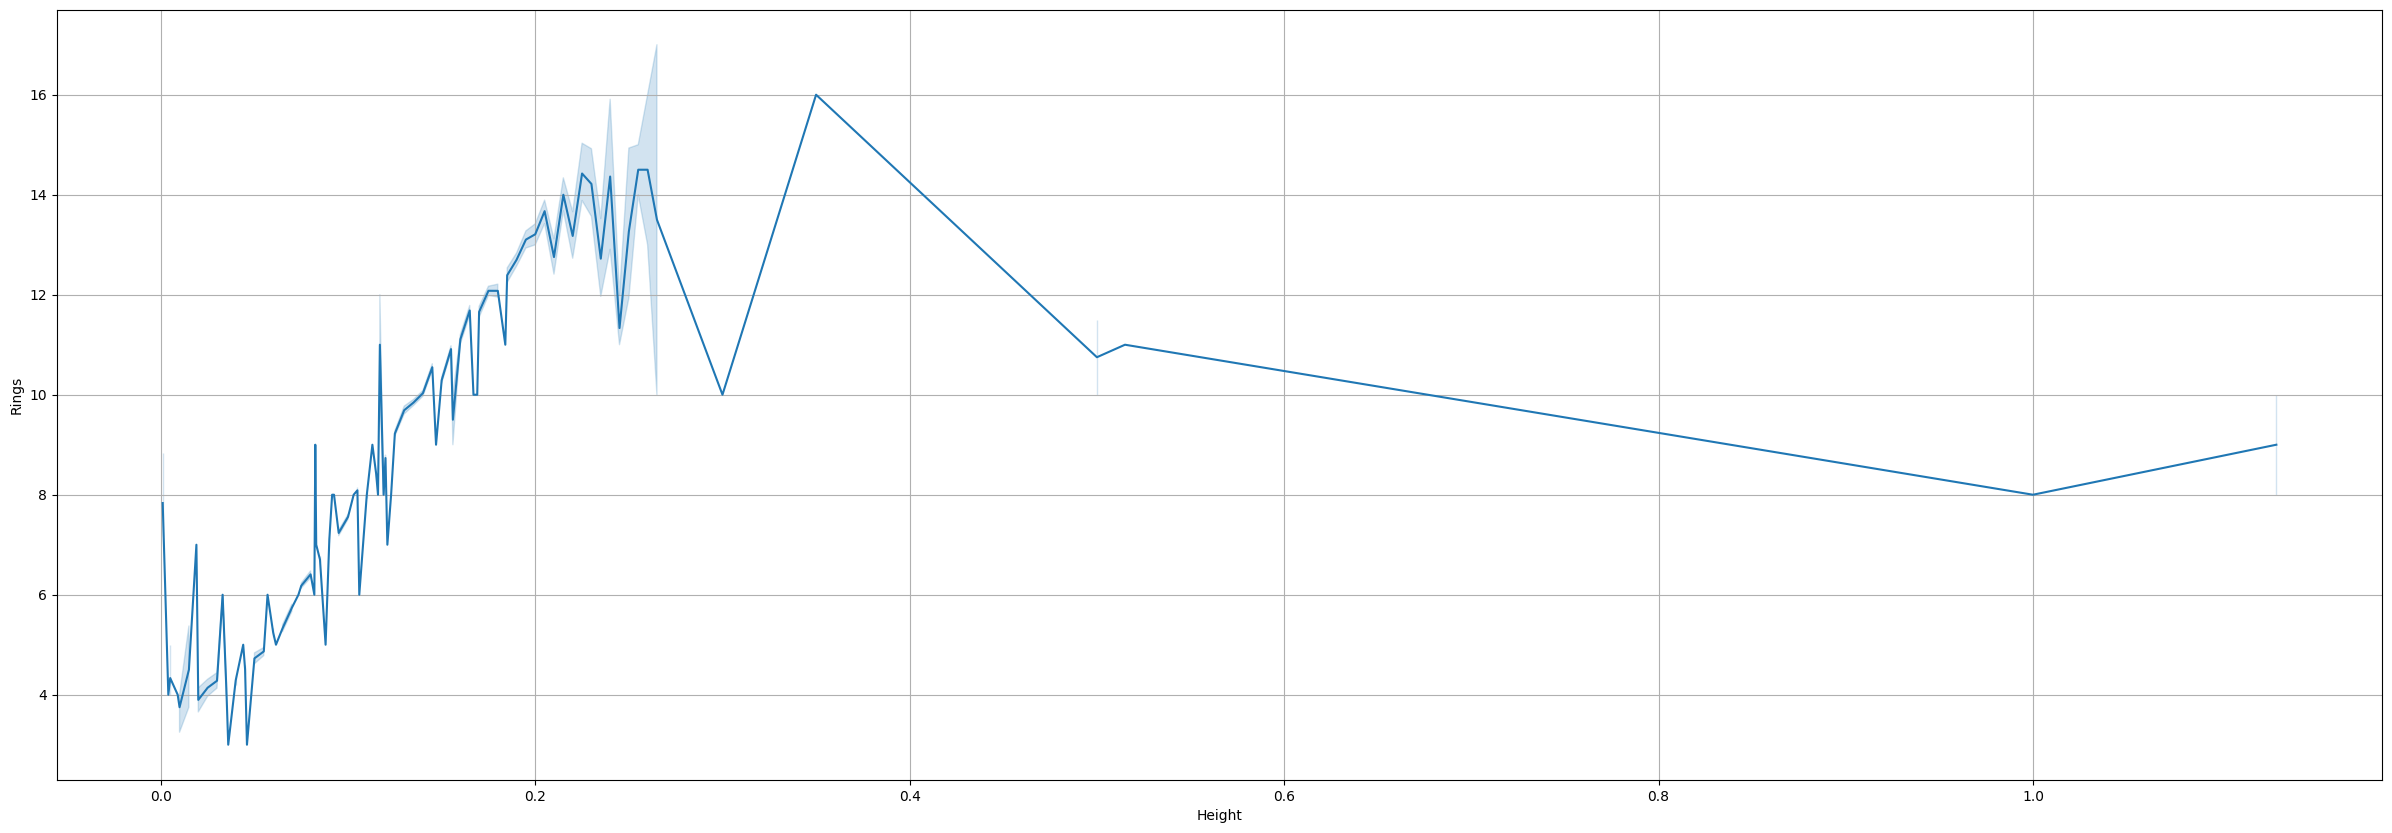

In [23]:
draw_numeric_features(raw_df, 'Height', 'Rings')

In [24]:
raw_df['Rings'].corr(raw_df['Height'])

0.6657748984511265

In [25]:
raw_df['Length_Diameter_Avg'] = (raw_df['Length'] + raw_df['Diameter'])/2
test_df['Length_Diameter_Avg'] = (test_df['Length'] + test_df['Diameter'])/2

In [26]:
raw_df['Height_Power2'] = raw_df['Height'] * raw_df['Height']
test_df['Height_Power2'] = test_df['Height'] * test_df['Height']

In [27]:
raw_df['Shell_Surface_Esti'] = (raw_df['Length'] * raw_df['Diameter']) + raw_df['Height_Power2']
test_df['Shell_Surface_Esti'] = (test_df['Length'] * test_df['Diameter']) + test_df['Height_Power2']

In [28]:
raw_df['Volume_Esti'] = raw_df['Length_Diameter_Avg'] * raw_df['Height_Power2']
test_df['Volume_Esti'] = test_df['Length_Diameter_Avg'] * test_df['Height_Power2']

In [29]:
raw_df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Length_Diameter_Avg,Height_Power2,Shell_Surface_Esti,Volume_Esti
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.4900,0.022500,0.259000,0.011025
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0.5600,0.021025,0.329725,0.011774
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.1350,0.000625,0.018225,0.000084
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.5350,0.022500,0.305125,0.012037
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.4900,0.016900,0.252775,0.008281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.2850,0.005625,0.084350,0.001603
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.4900,0.022500,0.258375,0.011025
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.3825,0.009025,0.152575,0.003452
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6,0.3075,0.005625,0.098775,0.001730


In [30]:
for col in raw_df.columns.tolist()[1:]:
    corr = raw_df['Rings'].corr(raw_df[col])
    print(f'{col}: {corr}')

Length: 0.6237856646237645
Diameter: 0.6368323390197851
Height: 0.6657748984511265
Whole weight: 0.6172738962824837
Whole weight.1: 0.5150668067459412
Whole weight.2: 0.5889543539062502
Shell weight: 0.6947655842875788
Rings: 1.0
Length_Diameter_Avg: 0.6313084640506218
Height_Power2: 0.5383769010273979
Shell_Surface_Esti: 0.6285261571295742
Volume_Esti: 0.5585124740868167


### Weight

In [31]:
raw_df.rename({
    'Whole weight': 'Whole_weight',
    'Whole weight.1': 'Whole_weight1',
    'Whole weight.2': 'Whole_weight2',
    'Shell weight': 'Shell_weight'
}, inplace=True, axis=1)

In [32]:
test_df.rename({
    'Whole weight': 'Whole_weight',
    'Whole weight.1': 'Whole_weight1',
    'Whole weight.2': 'Whole_weight2',
    'Shell weight': 'Shell_weight'
}, inplace=True, axis=1)

In [33]:
raw_df['Whole_weight12'] = raw_df['Whole_weight1'] + raw_df['Whole_weight2']
test_df['Whole_weight12'] = test_df['Whole_weight1'] + test_df['Whole_weight2']

In [34]:
raw_df['Total_weight'] = raw_df['Whole_weight12'] + raw_df['Shell_weight']
test_df['Total_weight'] = test_df['Whole_weight12'] + test_df['Shell_weight']

### Interact

In [35]:
raw_df['Weight_per_Shell_Surface'] = raw_df['Shell_weight'] / raw_df['Shell_Surface_Esti']
test_df['Weight_per_Shell_Surface'] = test_df['Shell_weight'] / test_df['Shell_Surface_Esti']

In [36]:
for col in raw_df.columns.tolist()[1:]:
    corr = raw_df['Rings'].corr(raw_df[col])
    print(f'{col}: {corr}')

Length: 0.6237856646237645
Diameter: 0.6368323390197851
Height: 0.6657748984511265
Whole_weight: 0.6172738962824837
Whole_weight1: 0.5150668067459412
Whole_weight2: 0.5889543539062502
Shell_weight: 0.6947655842875788
Rings: 1.0
Length_Diameter_Avg: 0.6313084640506218
Height_Power2: 0.5383769010273979
Shell_Surface_Esti: 0.6285261571295742
Volume_Esti: 0.5585124740868167
Whole_weight12: 0.5456502161906891
Total_weight: 0.5993978391476151
Weight_per_Shell_Surface: 0.7282790363343337


### Preprocessing

In [37]:
numeric_cols = raw_df.columns.tolist()[1:]
numeric_cols.remove('Rings')
categorical_cols = 'Sex'

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [40]:
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [41]:
raw_df[numeric_cols].describe()

,Length,Diameter,Height,Whole_weight,Whole_weight1,Whole_weight2,Shell_weight,Length_Diameter_Avg,Height_Power2,Shell_Surface_Esti,Volume_Esti,Whole_weight12,Total_weight,Weight_per_Shell_Surface
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.597430,0.582654,0.119100,0.278744,0.228499,0.222412,0.223615,0.606752,0.015502,0.152838,0.015202,0.256085,0.278290,0.092700
std,0.159752,0.164750,0.033665,0.162093,0.137477,0.132862,0.129749,0.165917,0.009511,0.065155,0.011119,0.152123,0.161723,0.026326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.487395,0.096546,0.147689,0.118695,0.113232,0.118087,0.503846,0.009475,0.104741,0.007216,0.132905,0.147009,0.075759
50%,0.635135,0.621849,0.123118,0.282451,0.221251,0.217907,0.222720,0.642308,0.015349,0.159969,0.014163,0.250945,0.277493,0.093538
75%,0.709459,0.697479,0.140833,0.377369,0.310693,0.305464,0.302441,0.723077,0.020048,0.197080,0.020823,0.349206,0.378727,0.108840
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
encoder = LabelEncoder()
encoder.fit(raw_df[categorical_cols])

LabelEncoder()

In [44]:
raw_df[categorical_cols] = encoder.transform(raw_df[categorical_cols])
test_df[categorical_cols] = encoder.transform(test_df[categorical_cols])

In [45]:
raw_df

,Sex,Length,Diameter,Height,Whole_weight,Whole_weight1,Whole_weight2,Shell_weight,Rings,Length_Diameter_Avg,Height_Power2,Shell_Surface_Esti,Volume_Esti,Whole_weight12,Total_weight,Weight_per_Shell_Surface
0,0,0.641892,0.630252,0.131975,0.272534,0.220242,0.192232,0.237668,11,0.653846,0.017620,0.165877,0.016684,0.238347,0.270275,0.099231
1,0,0.750000,0.731092,0.127547,0.399504,0.307330,0.363397,0.317389,11,0.761538,0.016465,0.211924,0.017818,0.369111,0.399240,0.104273
2,1,0.114865,0.092437,0.021258,0.006729,0.003026,0.003292,0.003488,6,0.107692,0.000489,0.009115,0.000127,0.003275,0.003799,0.024247
3,2,0.702703,0.705882,0.131975,0.323180,0.251849,0.269914,0.247633,10,0.723077,0.017620,0.195908,0.018216,0.291761,0.314340,0.086896
4,1,0.648649,0.621849,0.114260,0.276253,0.247814,0.210007,0.195316,9,0.653846,0.013234,0.161824,0.012531,0.265810,0.274834,0.082526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,2,0.351351,0.302521,0.065545,0.055428,0.045393,0.048058,0.043348,6,0.338462,0.004404,0.052167,0.002426,0.052154,0.055840,0.054036
90611,2,0.648649,0.621849,0.131975,0.310607,0.259247,0.238315,0.237668,9,0.653846,0.017620,0.165470,0.016684,0.285210,0.305603,0.099488
90612,1,0.486486,0.462185,0.083260,0.113157,0.100874,0.102699,0.079721,6,0.488462,0.007067,0.096587,0.005224,0.114638,0.116809,0.054114
90613,1,0.364865,0.361345,0.065545,0.070126,0.065232,0.063858,0.068261,6,0.373077,0.004404,0.061559,0.002617,0.073066,0.081102,0.074175


In [46]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [48]:
input_cols = numeric_cols + [categorical_cols]

In [49]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]
test_inputs = test_df[input_cols]

In [50]:
train_targets = train_df['Rings']
val_targets = val_df['Rings']

## Training model

### Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

In [52]:
regressor = {
    'LR': LinearRegression(n_jobs=-1),
    'RF': RandomForestRegressor(n_jobs=-1),
    'XGB': XGBRegressor(n_jobs=-1),
    'LGBM': LGBMRegressor(n_jobs=-1)
}
result = {'Reg': [], 'Loss': []}

In [55]:
for reg_name, reg in regressor.items():
    reg.fit(train_inputs, train_targets)
    val_preds = reg.predict(val_inputs)
    val_preds = pd.Series(val_preds).apply(lambda x: int(x))
    val_preds = val_preds.apply(lambda x: 0 if x<0 else x)
    loss = np.sqrt(mean_squared_log_error(val_targets, val_preds))
    result['Reg'].append(reg_name)
    result['Loss'].append(loss)
result_df = pd.DataFrame(result)
result_df

,Reg,Loss
0,LR,0.172445
1,RF,0.163055
2,XGB,0.162234
3,LGBM,0.160336


In [64]:
def test_params(**params):
    model = XGBRegressor(**params)
    model.fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    train_preds = pd.Series(train_preds).apply(lambda x: int(x))
    train_preds = train_preds.apply(lambda x: 0 if x<0 else x)
    train_loss = np.sqrt(mean_squared_log_error(train_targets, train_preds))
    val_preds = model.predict(val_inputs)
    val_preds = pd.Series(val_preds).apply(lambda x: int(x))
    val_preds = val_preds.apply(lambda x: 0 if x<0 else x)
    val_loss = np.sqrt(mean_squared_log_error(val_targets, val_preds))
    return train_loss, val_loss

In [66]:
for i in [None,3,4,5,6]:
    print(test_params(n_jobs=-1, max_depth=i))

(0.14459000435202757, 0.1622342192900303)
(0.15638276780651394, 0.16136234719924822)
(0.15354565865784947, 0.16175135309944932)
(0.14937695081471208, 0.16245786915888794)
(0.14459000435202757, 0.1622342192900303)


In [69]:
for i in [90,100,110,120]:
    print(test_params(n_jobs=-1, max_depth=3,
                      n_estimators=i))

(0.15665086489106922, 0.16158081498849025)
(0.15638276780651394, 0.16136234719924822)
(0.15609091441582582, 0.16135231997189117)
(0.15588454704311816, 0.16130082993096237)


In [70]:
for i in [0.05,0.1,0.15,0.2,0.3]:
    print(test_params(n_jobs=-1, max_depth=3,
                      n_estimators=100, learning_rate=i))

(0.1616807592118529, 0.1653412929213746)
(0.15908568626050487, 0.16322837359573475)
(0.15779081931194516, 0.16227734449100795)
(0.1571563601025682, 0.16195988894764002)
(0.15638276780651394, 0.16136234719924822)


In [71]:
model = XGBRegressor(n_jobs=-1, max_depth=3,
                     n_estimators=100, learning_rate=0.3)

In [72]:
model.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
val_preds = model.predict(val_inputs)
val_preds = pd.Series(val_preds).apply(lambda x: int(x))
val_preds = val_preds.apply(lambda x: 0 if x<0 else x)
val_loss = np.sqrt(mean_squared_log_error(val_targets, val_preds))
val_loss

0.16136234719924822

In [74]:
test_preds = model.predict(test_inputs)
test_preds = pd.Series(test_preds).apply(lambda x: int(x))
test_preds = test_preds.apply(lambda x: 0 if x<0 else x)

In [75]:
sub_df['Rings'] = test_preds
sub_df.to_csv('data/sub1.csv',index=None)

In [76]:
def test_params(**params):
    model = LGBMRegressor(**params)
    model.fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    train_preds = pd.Series(train_preds).apply(lambda x: int(x))
    train_preds = train_preds.apply(lambda x: 0 if x<0 else x)
    train_loss = np.sqrt(mean_squared_log_error(train_targets, train_preds))
    val_preds = model.predict(val_inputs)
    val_preds = pd.Series(val_preds).apply(lambda x: int(x))
    val_preds = val_preds.apply(lambda x: 0 if x<0 else x)
    val_loss = np.sqrt(mean_squared_log_error(val_targets, val_preds))
    return train_loss, val_loss

In [77]:
test_params(n_jobs=-1)

(0.15269719869576853, 0.16033596445242254)

In [83]:
losses = []
for i in [15,31,63,127]:
    losses.append(
        test_params(n_jobs=-1, num_leaves=i)
    )
for loss in losses:
    print(loss)

(0.15619012935422483, 0.16131803124271876)
(0.15269719869576853, 0.16033596445242254)
(0.14835800015536652, 0.16027337234372854)
(0.1416140631300592, 0.16047327610671247)


In [84]:
losses = []
for i in [0.03,0.05,0.1,0.15,0.2,0.3]:
    losses.append(
        test_params(n_jobs=-1, learning_rate=i)
    )
for loss in losses:
    print(loss)

(0.1569250089393043, 0.1615504437650266)
(0.1554061273476759, 0.1610781532216909)
(0.15269719869576853, 0.16033596445242254)
(0.15090804004814845, 0.1606651317325613)
(0.14928083013377702, 0.16011080139784772)
(0.14695446755413427, 0.16125768774239405)


In [86]:
losses = []
for i in [100,115,130,150]:
    losses.append(
        test_params(n_jobs=-1, n_estimators=i)
    )
for loss in losses:
    print(loss)

(0.15269719869576853, 0.16033596445242254)
(0.15205796013179074, 0.16034623059608813)
(0.15138867693589803, 0.16005721055047473)
(0.15056979205876986, 0.1600382538558303)


In [87]:
losses = []
for i in ['regression', 'tweedie']:
    losses.append(
        test_params(n_jobs=-1, objective=i)
    )
for loss in losses:
    print(loss)

(0.15269719869576853, 0.16033596445242254)
(0.15319304304716638, 0.1609073989784215)


In [88]:
losses = []
for i in [0.3,0.5,0.7,0.9,1]:
    losses.append(
        test_params(n_jobs=-1, subsample=i)
    )
for loss in losses:
    print(loss)

(0.15269719869576853, 0.16033596445242254)
(0.15269719869576853, 0.16033596445242254)
(0.15269719869576853, 0.16033596445242254)
(0.15269719869576853, 0.16033596445242254)
(0.15269719869576853, 0.16033596445242254)


In [89]:
losses = []
for i in [0,0.25,0.5,0.75,1,1.25,1.5]:
    losses.append(
        test_params(n_jobs=-1, reg_alpha=i)
    )
for loss in losses:
    print(loss)

(0.15269719869576853, 0.16033596445242254)
(0.1527517800689175, 0.16063225208825058)
(0.15269735126053527, 0.16046475857191833)
(0.15278358063875078, 0.1603798159033734)
(0.15287427634121292, 0.16073405153951428)
(0.15280229930262404, 0.16046781888567285)
(0.1527997250215416, 0.16038639875319824)


In [90]:
model = LGBMRegressor(n_jobs=-1)

In [91]:
model.fit(train_inputs, train_targets)

LGBMRegressor(n_jobs=-1)

In [94]:
test_preds = model.predict(test_inputs)
test_preds = pd.Series(test_preds)
test_preds = test_preds.apply(lambda x: 0 if x<0 else x)

In [95]:
sub_df['Rings'] = test_preds
sub_df.to_csv('data/sub2.csv',index=None)

In [96]:
model.feature_importances_

array([127, 156, 149, 428, 525, 239, 340,  85,   0, 106, 174, 194, 149,
       241,  87])